In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import load

In [2]:
salary_df =pd.read_csv('salary_prediction_data.csv')
salary_df.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [3]:
salary_df.shape

(1000, 7)

In [4]:
# info() to get metadata summary

salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [5]:
salary_df.describe()

,Experience,Age,Salary
count,1000.000000,1000.000000,1000.000000
mean,14.771000,42.377000,105558.404239
std,8.341111,13.609412,28256.972075
min,1.000000,20.000000,33510.510669
25%,7.000000,30.000000,85032.141517
50%,15.000000,43.000000,104314.518315
75%,22.000000,55.000000,126804.047524
max,29.000000,64.000000,193016.602150


***check for null values***

### Data Preparation

In [6]:
salary_df.isnull().sum()

Education     0
Experience    0
Location      0
Job_Title     0
Age           0
Gender        0
Salary        0
dtype: int64

In [7]:
salary_df.notna()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
995,True,True,True,True,True,True,True
996,True,True,True,True,True,True,True
997,True,True,True,True,True,True,True
998,True,True,True,True,True,True,True


In [8]:
# check for duplicates

salary_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

## Perform Exparatory Data Analysis

**Perform unvariate analysis btwn numeric attribute**
* Look at how data is distributed

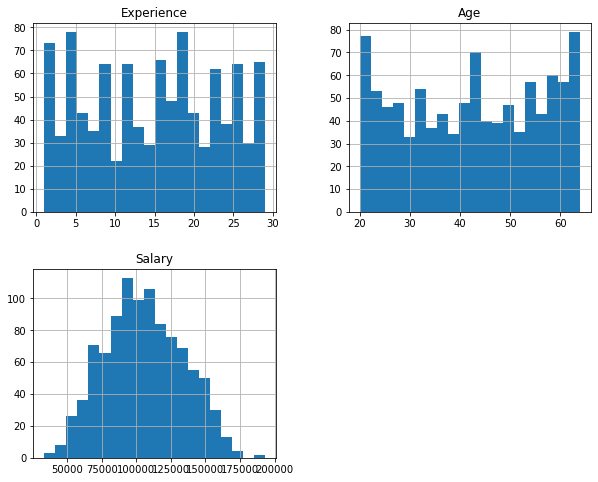

In [9]:
#fig, ax = plt.subplots(figsize=(10, 8))
salary_df.hist(bins = 20, figsize=(10, 8))
plt.show()

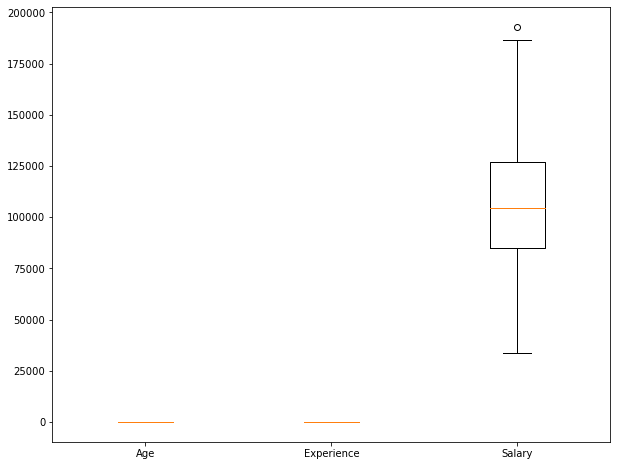

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))

# Matplotlib requires data in list format
ax.boxplot([salary_df['Age'], salary_df['Experience'], salary_df['Salary']], labels=['Age', 'Experience', 'Salary'])

plt.show()


In [11]:
# Removing outliers beyond a threshold
salary_df = salary_df[salary_df['Salary'] < salary_df['Salary'].quantile(0.95)]
salary_df.shape


(950, 7)

**Perform unvariate analysis btwn categorical attribute**

In [12]:
salary_df['Gender'].value_counts()

Male      490
Female    460
Name: Gender, dtype: int64

In [13]:
salary_df['Job_Title'].value_counts()

Analyst     255
Director    245
Engineer    227
Manager     223
Name: Job_Title, dtype: int64

* Why most people are Analyst?

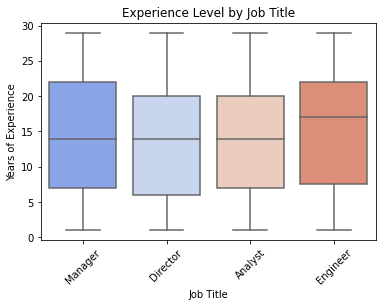

In [18]:
# find why most pple are analyst

fig, ax = plt.subplots()
sns.boxplot(x =salary_df['Job_Title'], y=salary_df['Experience'], palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel("Job Title")
plt.ylabel("Years of Experience")
plt.title("Experience Level by Job Title")

plt.show()

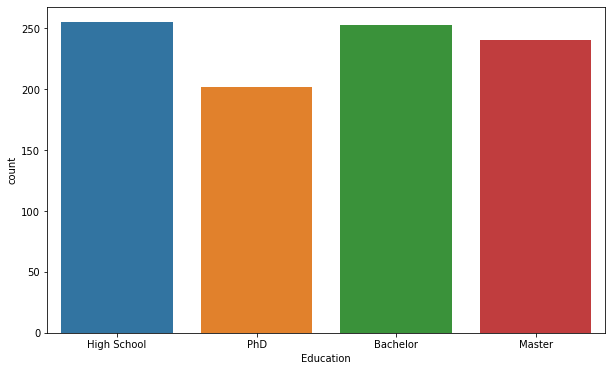

In [15]:
# countplot is used to visualize the count(frequency) of categorical data

plt.figure(figsize=(10,6))
sns.countplot(data=salary_df, x='Education')
plt.show()

**Bivariate Analysis**
* Analyze relationships between features and the target variable (Salary)

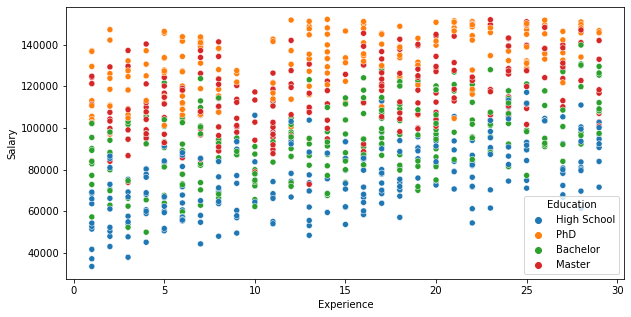

In [27]:
# Numerical vs salary

fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(data=salary_df, x='Experience', y='Salary', hue='Education')
plt.show()

**Perform correlation**

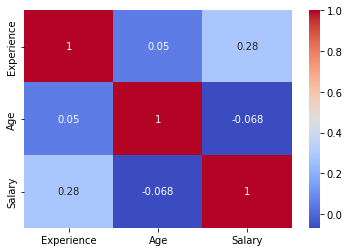

,Experience,Age,Salary
Experience,1.000000,0.049666,0.284807
Age,0.049666,1.000000,-0.068123
Salary,0.284807,-0.068123,1.000000


In [30]:
numeric_values =salary_df.select_dtypes(include=[float, int])

correlation = numeric_values.corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()
correlation

* Categorical values vs salary

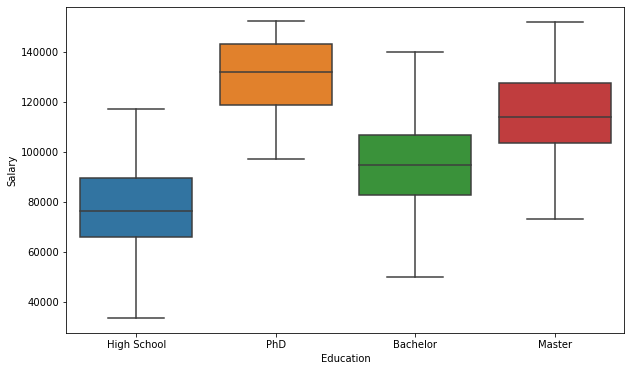

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=salary_df, x='Education', y='Salary')
plt.show()

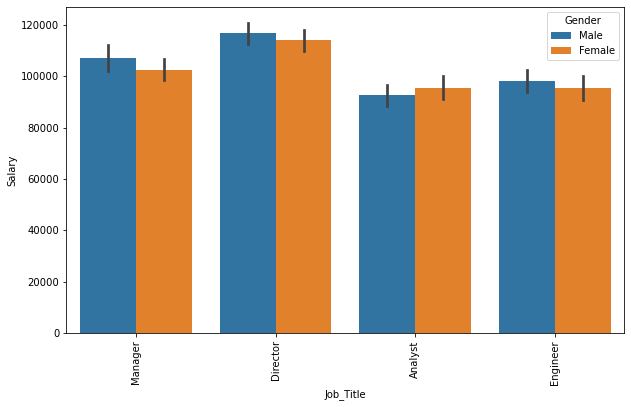

In [34]:
# Grouped bar plots
plt.figure(figsize=(10, 6))
sns.barplot(data=salary_df, x='Job_Title', y='Salary', hue='Gender')
plt.xticks(rotation=90)
plt.show()

* multivariate Analysis

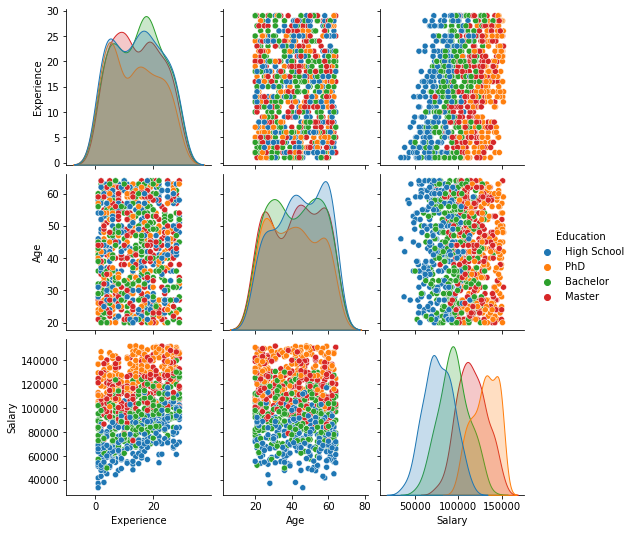

In [35]:
# Analyze interactions between multiple features
sns.pairplot(salary_df, hue='Education')
plt.show()



## **Hypothesis**

* Job Title has a significant impact on salary:

Certain roles (e.g., managers, engineers) may have higher salaries regardless of education or experience.

Action: Group by Job Title and compare average salaries.

* Gender pay gap exists:

Even with similar education and experience, one gender might earn more than the other.

Action: Compare average salaries by gender, controlling for education and experience.

* Experience matters more in certain job roles:

For example, in technical roles, experience might have a stronger impact on salary than in administrative roles.

Action: Analyze the correlation between Years of Experience and Salary for each job title.

* Higher education leads to faster salary growth:

People with advanced degrees might see their salaries increase more rapidly with experience.

Action: Plot Salary vs. Years of Experience for each education level.

* Outliers in salary are concentrated in specific job titles:

Some roles might have extremely high or low salaries compared to the rest.

Action: Use boxplots to analyze salary distribution by job title.

* Age and experience are highly correlated:

Older individuals might have more experience, but this isn’t always the case.

Action: Check the correlation between Age and Years of Experience.

* Part-time vs. full-time work affects salary:

If the dataset includes employment type, part-time workers might earn less than full-time workers.

Action: Compare salaries by employment type (if available).
